<a href="https://colab.research.google.com/github/alexandergribenchenko/EDVai_DE/blob/main/Sesion_01_Data_Exploration/NB_Sesion_01_Alexander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Librerías

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import itertools

import seaborn as sns
sns.set_theme(style="whitegrid")

# B. Dataset raw

In [ ]:
path_github = 'https://raw.githubusercontent.com/alexandergribenchenko/EDVai_DE/main/Sesion_01/data/Utimas%20Desvinculaciones_Row_data.csv'

In [ ]:
# Lectura simpre
df_raw = pd.read_csv(path_github)
df_raw.head()

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,Nivel,Grupo recruitment,Tiempo recruitment,Rango Salarial,RS competencia,Manager,Realizo Cursos
0,1,Romina,Brito,Marketing,03/05/2018,12/31/2018,N3,Grupo B,3,Rango 3,Rango 3,1,SI
1,2,Pedro,Lujan,Compras,03/06/2017,12/31/2021,N3,Grupo B,3,Rango 2,Rango 2,2,SI
2,3,Juan,Albornoz,IT,06/04/2018,04/30/2019,N4,Grupo C,4,Rango 4,Rango 4,5,NO
3,4,Sebastian,González,Legales,05/07/2018,05/30/2021,N2,Grupo A,4,Rango 2,Rango 2,3,SI
4,5,Franco,Rodríguez,Marketing,05/01/2017,11/30/2017,N5,Grupo C,6,Rango 5,Rango 4,1,SI


# C. Preprocesamiento Dataset

In [ ]:
df = df_raw.copy()
df['Fecha comienzo'] = pd.to_datetime(df['Fecha comienzo'], format='%m/%d/%Y')
df['Fecha fin'] = pd.to_datetime(df['Fecha fin'], format='%m/%d/%Y')
df['dias_total'] = (df['Fecha fin']-df['Fecha comienzo']).dt.days
df['Manager'] = df['Manager'].astype('int')
df = df.sort_values(by='dias_total', ascending=True)
df.head()

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,Nivel,Grupo recruitment,Tiempo recruitment,Rango Salarial,RS competencia,Manager,Realizo Cursos,dias_total
11,12,Luis,Sánchez,Ventas,2020-07-13,2020-12-31,N5,Grupo C,5,Rango 6,Rango 6,8,NO,171
22,23,Camila,Prieto,IT,2022-01-03,2022-07-01,N6,Grupo C,6,Rango 6,Rango 6,5,NO,179
4,5,Franco,Rodríguez,Marketing,2017-05-01,2017-11-30,N5,Grupo C,6,Rango 5,Rango 4,1,SI,213
24,25,Carolina,Petersen,Ventas,2021-07-05,2022-02-28,N7,Grupo B,4,Rango 6,Rango 6,8,SI,238
19,20,Marcelo,Flores,Ventas,2021-09-06,2022-05-31,N2,Grupo C,6,Rango 2,Rango 2,8,SI,267


# D. EDA

## ---> Variables categoricas Vs Target

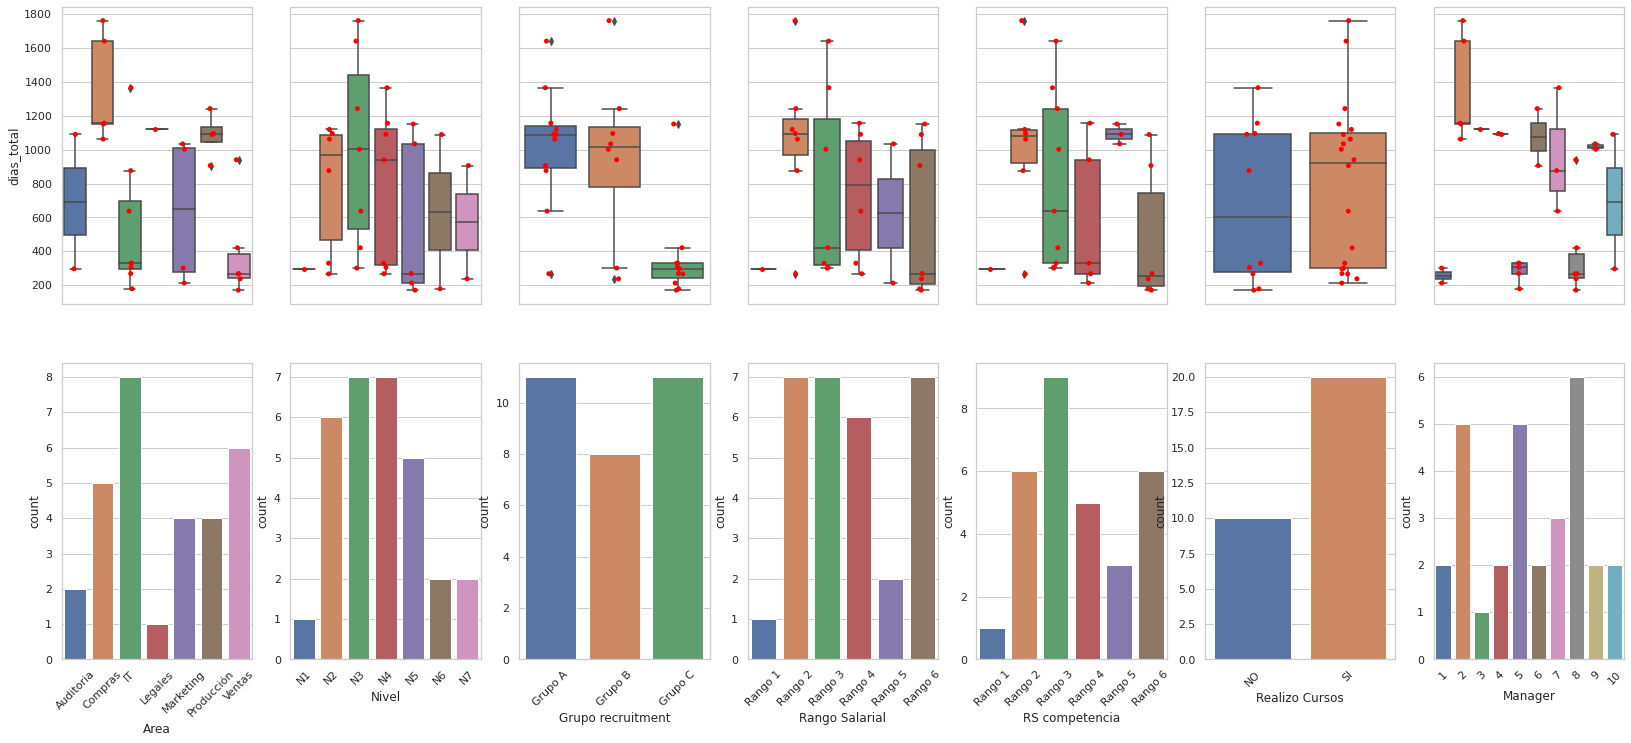

In [ ]:
col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos', 'Manager']

fig, axs = plt.subplots(nrows=2, ncols=len(col_cat), sharey=False)
fig.set_size_inches(28, 12)

for index, col in enumerate(col_cat):
  col_order = sorted(df[col].unique())
  
  sns.boxplot(ax=axs[0,index], x=col, y='dias_total', data=df, order=col_order)
  sns.stripplot(ax=axs[0,index], x=col, y='dias_total', data=df, order=col_order, color='red')
  axs[0,index].set_xticklabels([])
  axs[0,index].set_xlabel('')
  if index>0:
    axs[0,index].set_yticklabels([])
    axs[0,index].set_ylabel('')

  sns.countplot(ax=axs[1, index], x=col, data=df, order=col_order)
  axs[1, index].set_xticklabels(axs[1, index].get_xticklabels(), rotation=45)

plt.show()

## ---> Manager vs otras categorías

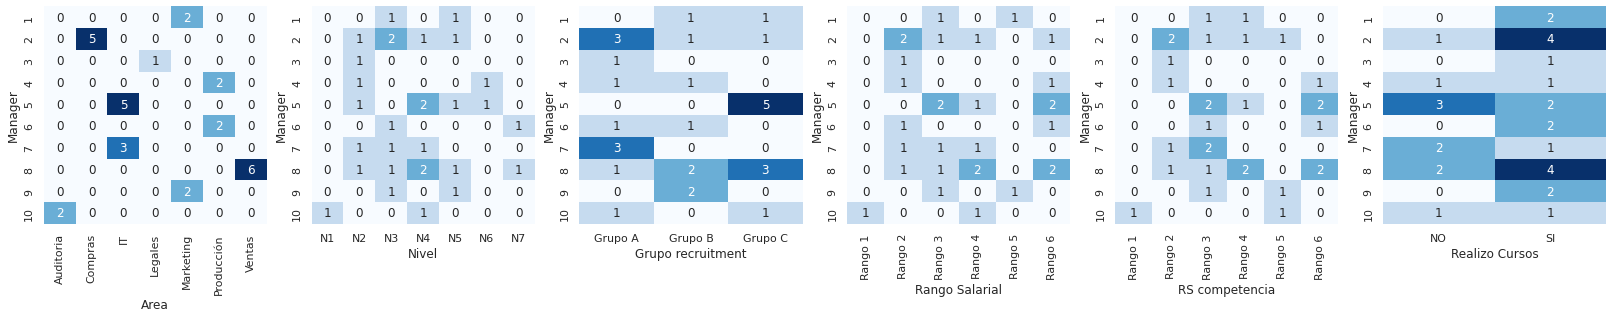

In [ ]:
col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos', 'Manager']

col_interest = 'Manager'

list_combinations = [(col1, col2) for col1, col2 in itertools.permutations(col_cat, 2) if col1 == col_interest]

fig, axs = plt.subplots(nrows=1, ncols=len(col_cat)-1)
fig.set_size_inches(28, 4)

for index, tuple_combination in enumerate(list_combinations): 

  freq_table = pd.crosstab(df[tuple_combination[0]], df[tuple_combination[1]])

  sns.heatmap(data=freq_table, cmap='Blues', annot=True, fmt='d', ax=axs[index], cbar=False, vmin=0, vmax=4)

plt.show()

## ---> Grupo recruitment vs otras categorías

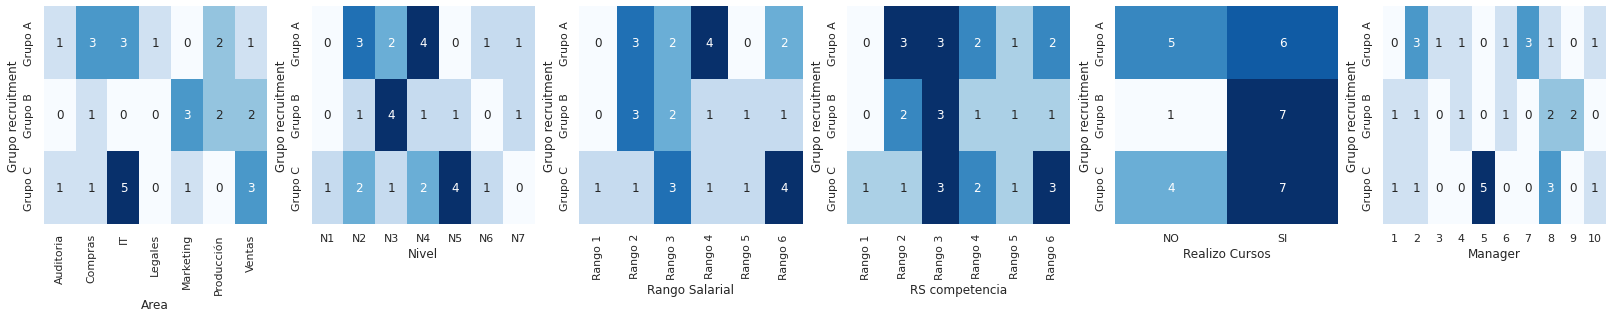

In [ ]:
col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos', 'Manager']

col_interest = 'Grupo recruitment'

list_combinations = [(col1, col2) for col1, col2 in itertools.permutations(col_cat, 2) if col1 == col_interest]

fig, axs = plt.subplots(nrows=1, ncols=len(col_cat)-1)
fig.set_size_inches(28, 4)

for index, tuple_combination in enumerate(list_combinations): 

  freq_table = pd.crosstab(df[tuple_combination[0]], df[tuple_combination[1]])

  sns.heatmap(data=freq_table, cmap='Blues', annot=True, fmt='d', ax=axs[index], cbar=False)

plt.show()

## ---> Area vs otras categorías

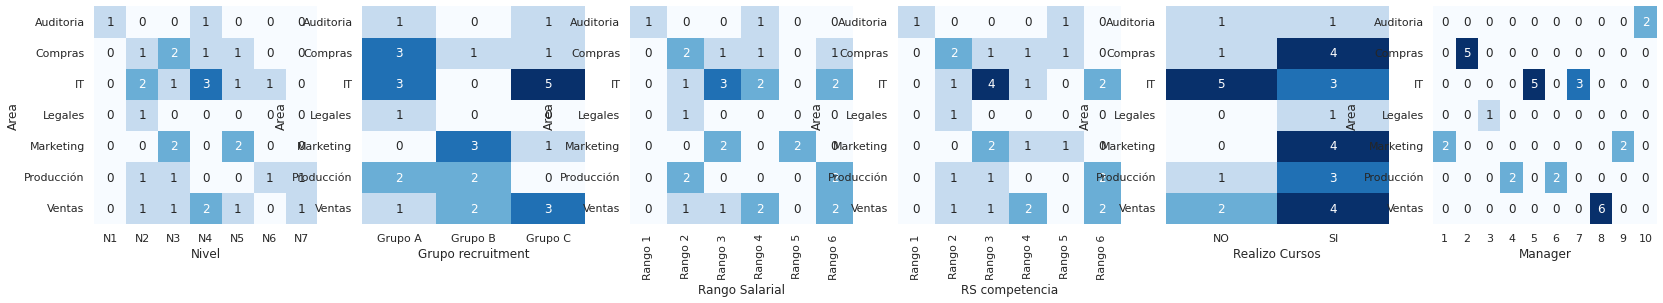

In [ ]:
col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos', 'Manager']

col_interest = 'Area'

list_combinations = [(col1, col2) for col1, col2 in itertools.permutations(col_cat, 2) if col1 == col_interest]

fig, axs = plt.subplots(nrows=1, ncols=len(col_cat)-1)
fig.set_size_inches(28, 4)

for index, tuple_combination in enumerate(list_combinations): 

  freq_table = pd.crosstab(df[tuple_combination[0]], df[tuple_combination[1]])

  sns.heatmap(data=freq_table, cmap='Blues', annot=True, fmt='d', ax=axs[index], cbar=False, vmin=0, vmax=4)

plt.show()

# XXX. Otras exploraciones incompletas

In [ ]:
detener

NameError: ignored

In [ ]:
df['Mes'] = df['Fecha fin'].dt.month
df['Año'] = df['Fecha fin'].dt.year

In [ ]:
df

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(28, 4)
sns.countplot(x='Mes', data=df, hue='Año')
plt.show()

In [ ]:
 datos_agregados = df.groupby(pd.Grouper(key='Fecha fin', freq='M'))['Id'].count().reset_index()
 

 sns.barplot(x='Fecha fin', y='Id', data=datos_agregados)
 plt.show()

In [ ]:
col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos', 'Manager']

In [ ]:
combinations = list(itertools.combinations(col_cat, 2))
combinations

In [ ]:


col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos', 'Manager']

area_combinations = [(col1, col2) for col1, col2 in itertools.combinations(col_cat, 2) if 'Nivel' in (col1, col2)]

print(area_combinations)


In [ ]:
import itertools

col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos', 'Manager']

nivel_combinations = [(col1, col2) for col1, col2 in itertools.permutations(col_cat, 2) if col1 == 'Manager']

print(nivel_combinations)


In [ ]:
col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos', 'Manager']

list_combinations = [(col1, col2) for col1, col2 in itertools.permutations(col_cat, 2) if col1 == 'Manager']






list_combinations


In [ ]:
col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos', 'Manager']

col_interest = 'Manager'

list_combinations = [(col1, col2) for col1, col2 in itertools.permutations(col_cat, 2) if col1 == col_interest]

fig, axs = plt.subplots(nrows=1, ncols=len(col_cat)-1)
fig.set_size_inches(28, 4)

for index, tuple_combination in enumerate(list_combinations): 

  freq_table = pd.crosstab(df[tuple_combination[0]], df[tuple_combination[1]])

  sns.heatmap(data=freq_table, cmap='Blues', annot=True, fmt='d', ax=axs[index], cbar=False, vmin=0, vmax=4)

plt.show()


In [ ]:
col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos', 'Manager']

col_interest = 'Grupo recruitment'

list_combinations = [(col1, col2) for col1, col2 in itertools.permutations(col_cat, 2) if col1 == col_interest]

fig, axs = plt.subplots(nrows=1, ncols=len(col_cat)-1)
fig.set_size_inches(28, 4)

for index, tuple_combination in enumerate(list_combinations): 

  freq_table = pd.crosstab(df[tuple_combination[0]], df[tuple_combination[1]])

  sns.heatmap(data=freq_table, cmap='Blues', annot=True, fmt='d', ax=axs[index], cbar=False)

plt.show()

In [ ]:
col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos', 'Manager']

col_interest = 'Area'

list_combinations = [(col1, col2) for col1, col2 in itertools.permutations(col_cat, 2) if col1 == col_interest]

fig, axs = plt.subplots(nrows=1, ncols=len(col_cat)-1)
fig.set_size_inches(28, 4)

for index, tuple_combination in enumerate(list_combinations): 

  freq_table = pd.crosstab(df[tuple_combination[0]], df[tuple_combination[1]])

  sns.heatmap(data=freq_table, cmap='Blues', annot=True, fmt='d', ax=axs[index], cbar=False, vmin=0, vmax=4)

plt.show()

In [ ]:
len(combinations)

In [ ]:
import itertools

In [ ]:
categories = ['sex', 'day', 'time', 'smoker']
combinations = list(itertools.combinations(categories, 2))
combinations

In [ ]:
col_cat.remove('Area')
col_cat

In [ ]:
col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos', 'Manager']

for index, col in enumerate(col_cat):
  col_cat_restricted = sorted(df[col].unique())


fig, axs = plt.subplots(nrows=1, ncols=len(col_cat), sharey=False)
fig.set_size_inches(28, 12)

freq_table = pd.crosstab(df['Area'], df['Manager'])




In [ ]:


# Creamos un subplot con Matplotlib
fig, ax = plt.subplots()

# Creamos el heatmap en el objeto Axes
sns.heatmap(data=freq_table, cmap='Blues', annot=True, fmt='d', ax=ax)

# Personalizamos el gráfico
ax.set_title('Frecuencia de renuncias por día y género')
ax.set_xlabel('Manager')
ax.set_ylabel('Area')

# Mostramos el gráfico
plt.show()

In [ ]:
fig, axs = plt.subplots()
fig.set_size_inches(24, 8)
sns.histplot(data = df, x='dias_total', kde=True, bins=20)
plt.show()

In [ ]:
col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos', 'Manager']

fig, axs = plt.subplots(nrows=2, ncols=len(col_cat), sharey=False)
fig.set_size_inches(28, 12)

for index, col in enumerate(col_cat):
  col_order = sorted(df[col].unique())
  
  sns.boxplot(ax=axs[0,index], x=col, y='dias_total', data=df, order=col_order)
  sns.stripplot(ax=axs[0,index], x=col, y='dias_total', data=df, order=col_order, color='red')
  axs[0,index].set_xticklabels([])
  axs[0,index].set_xlabel('')
  if index>0:
    axs[0,index].set_yticklabels([])
    axs[0,index].set_ylabel('')

  sns.countplot(ax=axs[1, index], x=col, data=df, order=col_order)
  axs[1, index].set_xticklabels(axs[1, index].get_xticklabels(), rotation=45)

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos
data = sns.load_dataset("tips")

# Crear una instancia de FacetGrid
g = sns.FacetGrid(data)

# Especificar los valores para cada gráfico
g.map(sns.histplot, "total_bill", bins=20)

# Especificar los ticks y etiquetas del eje x
g.set(yticks=[180, 365, 725, 1000])

# Mostrar el plot
plt.show()



In [ ]:
import seaborn as sns

# Cargar el conjunto de datos "tips" de Seaborn
tips = sns.load_dataset("tips")

# Crear una retícula con subretículas utilizando las variables "sex" y "smoker"
g = sns.FacetGrid(tips, row="sex", col="smoker")

# Especificar el tipo de gráfico que se mostrará en cada subretícula
g.map(sns.histplot, "total_bill")

# Mostrar la retícula de gráficos
g.fig.suptitle("Distribución del total de la cuenta")
g.fig.subplots_adjust(top=0.85)
g.set_axis_labels("Total de la cuenta", "Número de clientes")
g.fig.tight_layout()
sns.despine()


In [ ]:
col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos', 'Manager']

fig, axs = plt.subplots(nrows=1, ncols=len(col_cat), sharey=True)
fig.set_size_inches(28, 6)

for index, col in enumerate(col_cat):
  col_order = sorted(df[col].unique())
  sns.boxplot(ax=axs[index], x=col, y='dias_total', data=df, order=col_order)
  axs[index].set_xticklabels(axs[index].get_xticklabels(), rotation=45)
plt.show()

In [ ]:
# col_cat = ['Area', 'Nivel', 'Grupo recruitment', 'Rango Salarial', 'RS competencia', 'Realizo Cursos']

fig, axs = plt.subplots(nrows=1, ncols=len(col_cat), sharey=False)
fig.set_size_inches(28, 10)

for index, col in enumerate(col_cat):
  col_order = sorted(df[col].unique())
  sns.countplot(ax=axs[index], x=col, data=df, order=col_order)
  axs[index].set_xticklabels(axs[index].get_xticklabels(), rotation=45)
plt.show()

In [ ]:
df.info()

In [ ]:
cat

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

In [ ]:
grupos = [df[df['Grupo recruitment'] == grupo]['dias_total'] for grupo in df['Grupo recruitment'].unique()]


In [ ]:
y_grafica = 'Manager'

In [ ]:
# creating boxplot
sns.boxplot(y=y_grafica, x='dias_total', data=df)
  
# adding data points
sns.stripplot(y= y_grafica, x='dias_total', data=df)
# display plot
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Crea un dataframe con una variable categórica y una variable numérica
df = pd.DataFrame({'categoria': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'numerica': [10, 20, 30, 15, 25, 35]})

# Agrupa los datos por la variable categórica
grupos = [df[df['categoria'] == categoria]['numerica'] for categoria in df['categoria'].unique()]

# Realiza el análisis de varianza
f, p = f_oneway(*grupos)
print('F-value:', f)
print('p-value:', p)


In [ ]:
type(df.dias_total[0])

In [ ]:
df.info()

In [ ]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(10, 5))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=1920, xmax=2010)
fig.tight_layout()

In [ ]:
fig_01, ax_01 = plt.subplots(figsize=(10, 5))

sns.countplot(data=df, y="Manager",  order=df.Manager.value_counts().sort_values(ascending=False).index, color=sns.color_palette("Set1")[1], ax=ax_01)



ax_01.set_title("Número de observaciones por día")
ax_01.set_xlabel("Día")
ax_01.set_ylabel("Número de observaciones")

plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))







In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar un conjunto de datos de ejemplo
tips = sns.load_dataset("tips")

# Crear una figura y un conjunto de subplots de 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Crear un countplot en cada subplot
sns.countplot(x="day", data=tips, ax=axes[0, 0])
sns.countplot(x="time", data=tips, ax=axes[0, 1])
sns.countplot(x="sex", data=tips, ax=axes[1, 0])
sns.countplot(x="smoker", data=tips, ax=axes[1, 1])

# Ajustar los títulos y etiquetas de los ejes en cada subplot
axes[0, 0].set_title("Countplot de días")
axes[0, 1].set_title("Countplot de tiempo")
axes[1, 0].set_title("Countplot de género")
axes[1, 1].set_title("Countplot de fumadores")

axes[0, 0].set_xlabel("Día")
axes[0, 1].set_xlabel("Tiempo")
axes[1, 0].set_xlabel("Género")
axes[1, 1].set_xlabel("Fumador")

axes[0, 0].set_ylabel("Número de observaciones")
axes[0, 1].set_ylabel("Número de observaciones")
axes[1, 0].set_ylabel("Número de observaciones")
axes[1, 1].set_ylabel("Número de observaciones")

# Ajustar el espaciado entre subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Mostrar el gráfico
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# load example dataset
tips = sns.load_dataset("tips")

# create a countplot with normalization
sns.countplot(data=tips, x="day", hue="sex", normed=True)

# set title and labels
plt.title("Normalized Countplot of Tips Dataset")
plt.xlabel("Day of the Week")
plt.ylabel


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# load example dataset
tips = sns.load_dataset("tips")

# create a countplot with normalization
sns.countplot(data=tips, x="day", hue="sex", scale="normalize")

# set title and labels
plt.title("Normalized Countplot of Tips Dataset")
plt.xlabel("Day of the Week")
plt.ylabel("Proportion")

# show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

N = 250
df_x_1 = pd.DataFrame({'concern_virus': np.random.choice(['a', 'b', 'c', 'd', 'e'], N),
                       'age': np.random.choice(['younger', 'older'], N)})
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df_x_1, x='concern_virus', order=['a', 'b', 'c', 'd', 'e'],
                   hue='age', hue_order=['younger', 'older'],
                   palette=['chartreuse', 'darkviolet'])
plt.xticks(size=12)
plt.xlabel('Level of Concern', size=14)
plt.yticks(size=12)
plt.ylabel('Number of People', size=12)
plt.title("Older and Younger People's Concern over the Virus", size=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(df_x_1)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear DataFrame con datos de ejemplo
df = pd.DataFrame({
    'fecha_renuncia': pd.date_range(start='2022-01-01', end='2022-12-01', freq='MS')
})

# Agregar columna con cantidad de renuncias aleatorias en cada fecha
import random
df['renuncias'] = [random.randint(5, 20) for _ in range(len(df))]

# Convertir la columna de fechas en el índice del DataFrame
df = df.set_index('fecha_renuncia')

# Agrupar los datos por mes y obtener la suma de renuncias en cada mes
renuncias_mes = df.resample('M').sum()

# Crear gráfica de línea de la tendencia mensual de renuncias
sns.lineplot(x=renuncias_mes.index, y='renuncias', data=renuncias_mes)

# Mostrar el gráfico
plt.show()


In [ ]:
df = pd.DataFrame({
    'fecha_renuncia': pd.date_range(start='2022-01-01', end='2022-12-01', freq='MS')
})
df

In [ ]:
conteo_por_mes = df.groupby(pd.Grouper(key='fecha_renuncia', freq='M')).count()

# Mostrar el conteo por mes
print(conteo_por_mes)

In [ ]:
fechas = pd.date_range(start='2022-01-01', end='2022-05-31', freq='D')
fechas = pd.concat([fechas[:10], fechas[20:25], fechas[20:25], fechas[28:]])

df = pd.DataFrame({'fecha': fechas})
df

In [ ]:
import pandas as pd

# Crear DataFrame con datos de ejemplo
df = pd.DataFrame({
    'fecha': pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
})

# Agrupar los datos por mes y contar cuántos datos hay en cada mes
conteo_por_mes = df.groupby(pd.Grouper(key='fecha', freq='M')).count()

# Mostrar el conteo por mes
print(conteo_por_mes)


In [ ]:
df['renuncias'] = [random.randint(5, 20) for _ in range(len(df))]
df